
# **Adult Income Prediction — Data Cleaning & Exploratory Analysis Project**


## **Introduction**

Data cleaning is a critical step in any data science workflow, ensuring that analyses and models produce reliable, unbiased, and interpretable results.
This project demonstrates the complete data cleaning and exploratory data analysis (EDA) process on the **Adult Income Dataset** (also known as the *Census Income Dataset*), a real-world dataset extracted from the 1994 U.S. Census database.

The dataset aims to predict whether an individual’s annual income exceeds **$50,000** based on demographic and employment attributes. However, it contains several data quality issues such as missing values (represented by “?”), inconsistent categorical values, and potential outliers in numerical features.

By the end of this project, we will have a clean, well-structured dataset ready for model development and income prediction tasks.

📘 **Dataset Source:** [UCI Machine Learning Repository – Adult Dataset](https://archive.ics.uci.edu/dataset/2/adult)


---


## **Dataset Overview**

* **Instances:** ~32,561 (may vary after cleaning)
* **Attributes:** 15 (6 continuous, 8 categorical, 1 target)

| Feature          | Description                                       | Type        |
| ---------------- | ------------------------------------------------- | ----------- |
| `age`            | Age in years                                      | Continuous  |
| `workclass`      | Employment type (Private, Self-emp-not-inc, etc.) | Categorical |
| `fnlwgt`         | Census final weight (sampling weight)             | Continuous  |
| `education`      | Education level                                   | Categorical |
| `education-num`  | Years of education                                | Continuous  |
| `marital-status` | Marital status                                    | Categorical |
| `occupation`     | Job type                                          | Categorical |
| `relationship`   | Family role                                       | Categorical |
| `race`           | Race                                              | Categorical |
| `sex`            | Gender                                            | Categorical |
| `capital-gain`   | Capital gains                                     | Continuous  |
| `capital-loss`   | Capital losses                                    | Continuous  |
| `hours-per-week` | Hours worked per week                             | Continuous  |
| `native-country` | Country of origin                                 | Categorical |
| `income`         | Target variable (<=50K or >50K)                   | Binary      |

### **Common Data Quality Issues**

* Missing values represented as `'?'` (≈7% in `workclass`, `occupation`, `native-country`)
* Duplicates across rows
* Outliers (notably in `capital-gain`)
* Inconsistent string formatting (leading/trailing spaces)
* Incorrect or inefficient data types

---


## **Data Cleaning and Preparation Process**

This section walks through the **step-by-step process of cleaning and preparing the Adult Income dataset**.
Each step focuses on identifying a data issue and applying an appropriate cleaning or transformation technique to resolve it.

---

### **Question 1: Installing and Importing Required Libraries**

**Description:**


- Before working with any dataset, we must ensure the required Python libraries are installed and imported.
- We’ll use **Pandas** for data manipulation, **NumPy** for numerical operations, and **Matplotlib** for visualizations.


In [70]:
# Install libraries (run only once if not installed)
#!pip install pandas numpy matplotlib

# Import essential libraries
import pandas as pd            # For handling structured data
import numpy as np             # For numerical operations
import matplotlib.pyplot as plt  # For data visualization

---

### **Question 2: Loading the Dataset**

**Description:**
- Reading it into a Pandas DataFrame for clarity and accessibility.

In [71]:
# Load dataset and assign headers
df = pd.read_csv('adult.csv')



In [72]:
# Display first few rows to confirm successful loading
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


---

### **Question 3: Inspecting the Dataset Structure**

**Description:**
Initial inspection helps us understand dataset size, data types, missing values, and potential anomalies before cleaning.

In [102]:
# Display dataset dimensions (rows, columns)




Dataset Shape: (48842, 15)


In [4]:
df.shape

(48842, 15)

In [103]:
# Display data types and null value info




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [104]:
# Display statistical summary for numeric columns





Descriptive Statistics:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [105]:
# Preview first few rows for visual validation




,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


---

### **Question 4: Handling Missing Values Represented as '?'**

**Description:**
- In this dataset, missing values are stored as `'?'` instead of standard NaN.
- We’ll replace `'?'` with `np.nan` for consistency and impute missing categorical data using the most frequent (mode) value.


In [22]:
df.head(230)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,18,Private,243313,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
226,60,?,24215,10th,6,Divorced,?,Not-in-family,Amer-Indian-Eskimo,Female,0,0,10,United-States,<=50K
227,66,Self-emp-not-inc,167687,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,1409,0,50,United-States,<=50K
228,75,Private,314209,Assoc-voc,11,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,20,Columbia,<=50K


In [106]:
# Replace '?' symbols with actual NaN values





In [46]:
df.replace('?',np.nan,inplace=True)

In [107]:
# Check total missing values per column before filling



Missing Values Before Filling:
 age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


In [26]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [108]:
# Fill missing categorical values using mode (most frequent value)




In [23]:
categorical_cols=df.select_dtypes(include='object').columns.tolist()
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [27]:
mode_dict={}
for col in categorical_cols:
    mode_value=df[col].mode()[0]
    mode_dict[col]=mode_value

In [28]:
df.fillna(mode_dict,inplace=True)

In [109]:
# Verify missing values after imputation





Missing Values After Filling:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [29]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

---

### **Question 5: Detecting and Removing Duplicate Records**

**Description:**
- Duplicate records can bias the analysis and distort frequency-based insights.
- We’ll identify and remove duplicate rows to ensure each observation is unique.

In [110]:
# Count total duplicate rows




Duplicate rows detected: 29


In [30]:
duplicates=df[df.duplicated()]

In [31]:
duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [111]:
# Drop duplicates if any exist




In [32]:
df=df.drop_duplicates()

In [112]:
# Confirm new dataset shape



Shape after removing duplicates: (48813, 15)


In [33]:
df.shape

(48813, 15)

---

### **Question 6: Cleaning String Formatting Issues**

**Description:**
- Some string fields may have unwanted leading or trailing spaces, causing inconsistencies during grouping or comparison.
- We’ll trim spaces in all categorical columns.

In [113]:
# Identify categorical columns



In [73]:
categorical_cols=df.select_dtypes(include='object').columns.tolist()
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [114]:
# Strip leading and trailing spaces in each categorical field



String formatting issues cleaned successfully.


---

### **Question 7: Converting Data Types for Efficiency**

**Description:**
- Converting columns to appropriate types improves memory efficiency and computational performance.
- We’ll ensure numerical columns are integers and categorical fields are of category type.

In [115]:
# Convert numeric columns to integer32 type




In [74]:
numeric_cols=df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [75]:
df=df.astype({'age':'int32','fnlwgt':'int32','education-num':'int32','capital-gain':'int32','capital-loss':'int32','hours-per-week':'int32'})

In [76]:
df.dtypes

age                int32
workclass         object
fnlwgt             int32
education         object
education-num      int32
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int32
capital-loss       int32
hours-per-week     int32
native-country    object
income            object
dtype: object

In [116]:
# Convert categorical columns to category type




In [77]:
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [78]:
df=df.astype({'workclass':'category','education':'category','marital-status':'category','occupation':'category','relationship':'category','race':'category','sex':'category','native-country':'category','income':'category'})

In [79]:
df.dtypes

age                  int32
workclass         category
fnlwgt               int32
education         category
education-num        int32
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int32
capital-loss         int32
hours-per-week       int32
native-country    category
income            category
dtype: object

In [80]:
df['income'].values

['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', ..., '<=50K.', '<=50K.', '<=50K.', '<=50K.', '>50K.']
Length: 48842
Categories (4, object): ['<=50K', '<=50K.', '>50K', '>50K.']

In [118]:
# Encode target variable 'income' as binary integers (0 and 1)




In [81]:
df['income'].dtype

CategoricalDtype(categories=['<=50K', '<=50K.', '>50K', '>50K.'], ordered=False, categories_dtype=object)

In [82]:
df['income']=df['income'].map({'<=50K':0, '<=50K.':0, '>50K':1, '>50K.':1})

In [83]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [119]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0



### **Question 8: Handling Skewed Data and Extreme Values in ‘capital-gain’**

**Description:**
- The `capital-gain` feature is highly skewed — most values are `0`, while a few records have extremely large gains (e.g., 99999).
- Using the IQR method doesn’t work well because most values are identical.
- Instead, we’ll analyze the distribution and treat extreme outliers by **capping** them using percentile-based thresholds.




In [120]:
# Analyze capital-gain distribution



count    48813.000000
mean      1079.708705
std       7454.185982
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


In [91]:
df['capital-gain'].describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

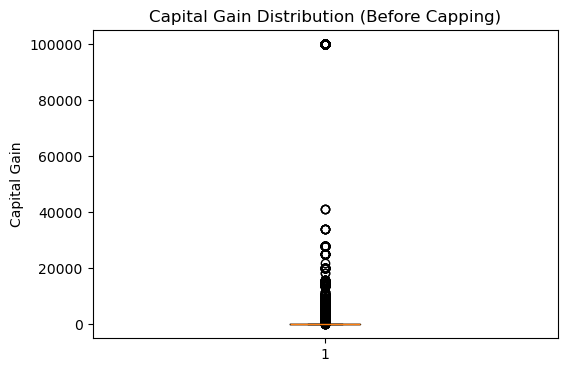

In [121]:
# Visualize skewness




In [93]:
import seaborn as sns

<Axes: xlabel='capital-gain'>

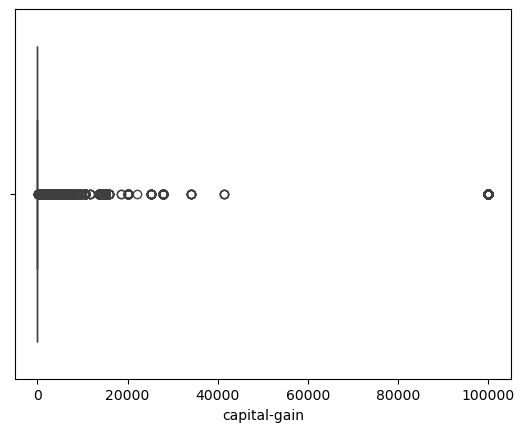

In [95]:
sns.boxplot(x='capital-gain',data=df)

In [122]:
# Treat extreme outliers using percentiles



In [96]:
lower_limit=df['capital-gain'].quantile(0.25)
upper_limit=df['capital-gain'].quantile(0.75)

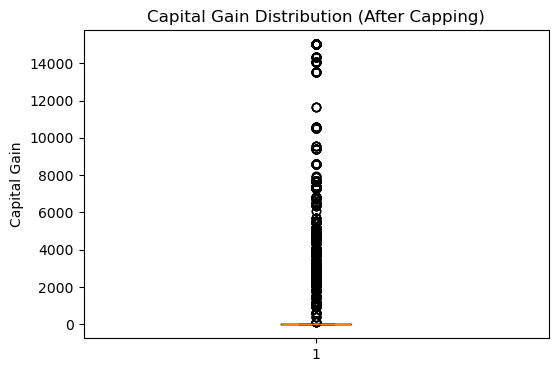

In [125]:
# Verify capping effect



<Axes: title={'center': 'capital gain distribution'}>

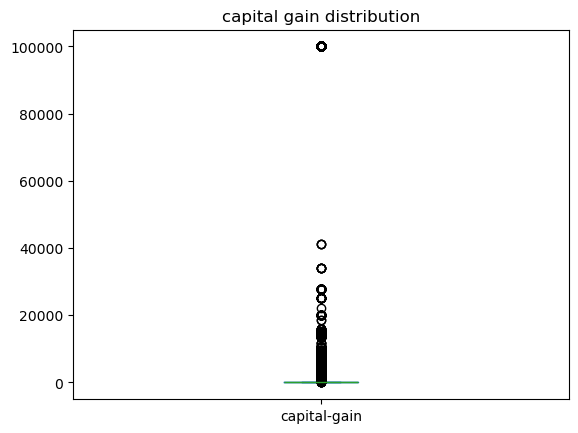

In [97]:
df['capital-gain'].plot(kind='box',title='capital gain distribution')

---

### **Question 9: Creating New Features for Better Analysis**

**Description:**
- Feature engineering helps in capturing meaningful patterns from existing data.
- We’ll create new attributes like age groups, net capital, and working-hour categories for richer analysis.

In [127]:
# Create a new column 'Age_Group' by applying a function 
# that categorizes each individual's age as 'Young', 'Adult', or 'Senior'



In [128]:
# Compute net capital as gain minus loss



In [129]:
# Categorize working hours into bins



In [130]:
# Preview newly created columns



,age,Age_Group,Capital_Net,Hours_Category
0,39,Adult,2174.0,Full-time
1,50,Senior,0.0,Part-time
2,38,Adult,0.0,Full-time
3,53,Senior,0.0,Full-time
4,28,Adult,0.0,Full-time


---

### **Question 10: Summarizing Income Distribution by Education Level**

**Description:**
- Grouping by education helps understand income distribution patterns.
- We’ll compute the average income ratio for each education category.

In [134]:

# Group by education and compute average income





,education,income
0,10th,0.062635
1,11th,0.050773
2,12th,0.073171
3,1st-4th,0.032653
4,5th-6th,0.053150
5,7th-8th,0.064990
6,9th,0.054233
7,Assoc-acdm,0.257964
8,Assoc-voc,0.253398
9,Bachelors,0.413092


In [136]:
# Sort in descending order for better comparison




In [137]:
print("Average income proportion by education level:")
edu_income

Average income proportion by education level:


,education,income
14,Prof-school,0.739808
10,Doctorate,0.725589
12,Masters,0.549322
9,Bachelors,0.413092
7,Assoc-acdm,0.257964
8,Assoc-voc,0.253398
15,Some-college,0.189714
11,HS-grad,0.158585
2,12th,0.073171
5,7th-8th,0.064990


---

### **Question 11: Applying Normalization and Conditional Logic**

**Description:**
- To prepare data for modeling, normalization and conditional feature creation are often required.
- We’ll normalize working hours and create a binary flag for high education levels.

In [138]:
# Create a new column 'Normalized_Hours' by scaling 'hours-per-week' values between 0 and 1




In [140]:
# Create a new column 'High_Education' where 1 indicates education years greater than 12, and 0 otherwise




In [141]:
# Display newly created features




,hours-per-week,Normalized_Hours,education-num,High_Education
0,40,0.404040,13,1
1,13,0.131313,13,1
2,40,0.404040,9,0
3,40,0.404040,7,0
4,40,0.404040,13,1


---

### **Question 12: Saving the Final Cleaned Dataset**

**Description:**
After cleaning and transformation, we’ll save the prepared dataset as a new CSV file for analysis and modeling.

In [142]:
# Save cleaned dataset to a new CSV file
df.to_csv('cleaned_adult_income.csv', index=False)

print("Cleaned dataset successfully saved as 'cleaned_adult_income.csv'")

Cleaned dataset successfully saved as 'cleaned_adult_income.csv'
